In [1]:
# Importing the libraries
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

The IMDB dataset has labels for both positive and negative sentiments related to movie reviews and every review is converted into a set of word embeddings during the dataset's preparation, where each word is represented by a fixed-size vector.

In [2]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

Custom Embedding layer with a 100-size training samples

In [3]:
features_num = 10000 # These are the no. of words considered as features
length = 150 # cutoff word limit

# Data loading to integers
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=features_num)
train_data = train_data[:100]
train_labels = train_labels[:100]

# The integer lists are now transformed into a 2D integer tensor with the shape of {(samples, maxlen)}.
train_data = pad_sequences(train_data, maxlen=length)
test_data = pad_sequences(test_data, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model_1 = Sequential()

# In order to finally flatten the embedded inputs, the maximum length of the input to the Embedding layer is provided.
model_1.add(Embedding(10000, 8, input_length=length))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model_1.add(Flatten())

# We add the classifier on top
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_1.summary()


17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Training the model
history1 = model_1.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 4s 741ms/step - loss: 0.6935 - acc: 0.4750 - val_loss: 0.6911 - val_acc: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 70ms/step - loss: 0.6695 - acc: 0.8625 - val_loss: 0.6922 - val_acc: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 36ms/step - loss: 0.6520 - acc: 0.9250 - val_loss: 0.6915 - val_acc: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 80ms/step - loss: 0.6359 - acc: 0.9500 - val_loss: 0.6922 - val_acc: 0.5500
Epoch 5/10
3/3 [==============================] - 0s 45ms/step - loss: 0.6207 - acc: 0.9625 - val_loss: 0.6931 - val_acc: 0.5500
Epoch 6/10
3/3 [==============================] - 0s 57ms/step - loss: 0.6053 - acc: 0.9625 - val_loss: 0.6943 - val_acc: 0.6000
Epoch 7/10
3/3 [==============================] - 0s 45ms/step - loss: 0.5901 - acc: 0.9625 - val_loss: 0.6940 - val_acc: 0.6000
Epoch 8/10
3/3 [==============================] - 0s 41ms/step - loss: 0.5746 - acc: 0.9625 - va

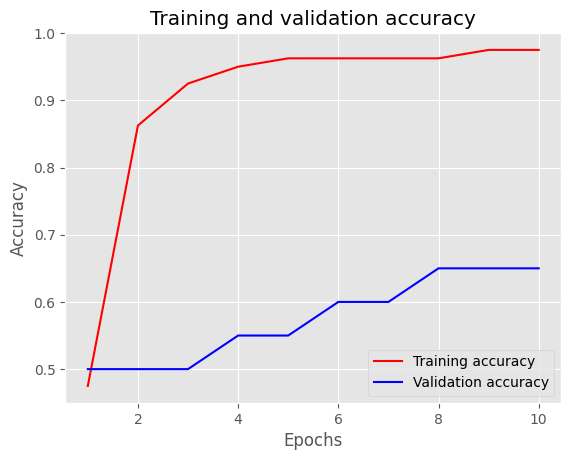

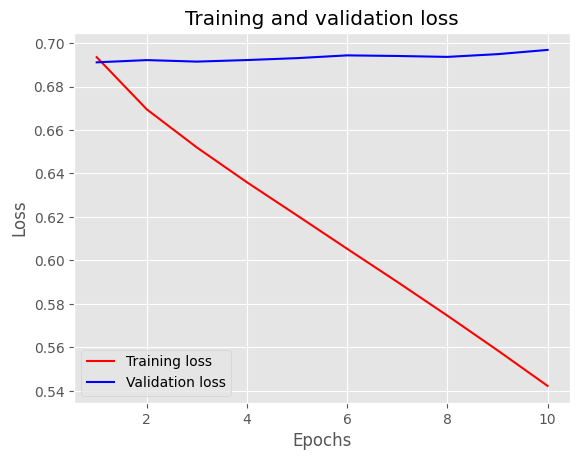

In [5]:
# displaying the accuracy and loss curves for training and validation
import matplotlib.pyplot as plt

# Training accuracy
train_acc = history1.history["acc"]
# Validation accuracy
validation_acc = history1.history["val_acc"]
# Training loss
train_loss = history1.history["loss"]
# Validation loss
validation_loss = history1.history["val_loss"]

#plots every epoch, here 10
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, "red", label = "Training accuracy")
plt.plot(epochs, validation_acc, "blue", label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, train_loss, "red", label = "Training loss")
plt.plot(epochs, validation_loss, "blue", label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [6]:
# Evaluating the model on test dataset
test_loss, test_acc = model_1.evaluate(test_data, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 3ms/step - loss: 0.6955 - acc: 0.5040
Test loss: 0.6954501271247864
Test accuracy: 0.5039600133895874


custom-trained embedding layer with training sample size = 5000

In [7]:
max_features = 10000 #no. of words as features
maxlength = 150 # Cutoff reviews upto 150 words

# Data should be loaded as lists of integers
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

x_train = train_data[:5000]
y_train = train_labels[:5000]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=maxlength)
x_test = pad_sequences(test_data, maxlen=maxlength)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model_2 = Sequential()

# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model_2.add(Embedding(10000, 8, input_length=maxlength))

# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model_2.add(Flatten())

# We add the classifier on top
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Training the model
history2 = model_2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 1s 5ms/step - loss: 0.6920 - acc: 0.5250 - val_loss: 0.6896 - val_acc: 0.5430
Epoch 2/10
125/125 [==============================] - 1s 4ms/step - loss: 0.6665 - acc: 0.7268 - val_loss: 0.6706 - val_acc: 0.6760
Epoch 3/10
125/125 [==============================] - 0s 4ms/step - loss: 0.6071 - acc: 0.8200 - val_loss: 0.6215 - val_acc: 0.7290
Epoch 4/10
125/125 [==============================] - 0s 4ms/step - loss: 0.5096 - acc: 0.8637 - val_loss: 0.5549 - val_acc: 0.7710
Epoch 5/10
125/125 [==============================] - 0s 4ms/step - loss: 0.4031 - acc: 0.8988 - val_loss: 0.4926 - val_acc: 0.7910
Epoch 6/10
125/125 [==============================] - 0s 4ms/step - loss: 0.3134 - acc: 0.9283 - val_loss: 0.4520 - val_acc: 0.8140
Epoch 7/10
125/125 [==============================] - 0s 4ms/step - loss: 0.2455 - acc: 0.9470 - val_loss: 0.4280 - val_acc: 0.8220
Epoch 8/10
125/125 [==============================] - 0s 4ms/step - loss: 0.

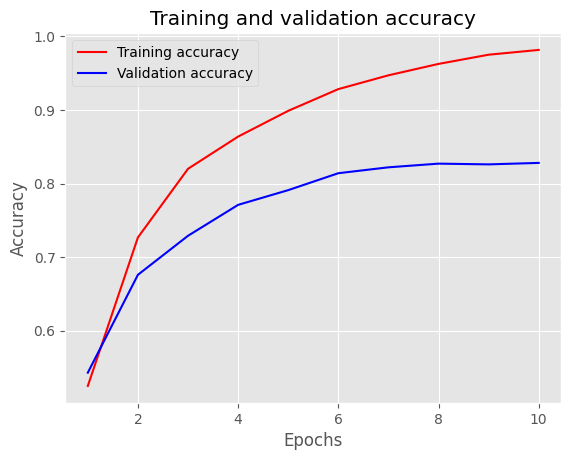

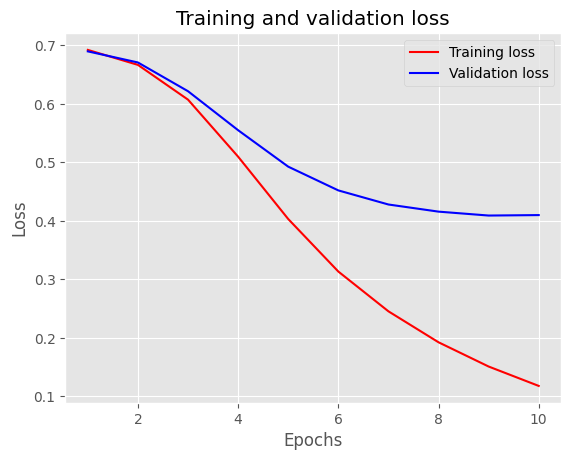

In [9]:
# Displaying the accuracy and loss curves

# Training accuracy
train_acc = history2.history["acc"]
# Validation accuracy
validation_acc = history2.history["val_acc"]
# Training loss
train_loss = history2.history["loss"]
# Validation loss
validation_loss = history2.history["val_loss"]

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, "red", label = "Training accuracy")
plt.plot(epochs, validation_acc, "blue", label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, train_loss, "red", label = "Training loss")
plt.plot(epochs, validation_loss, "blue", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [10]:
# Evaluating the model with test dataset
test_loss2, test_accuracy2 = model_2.evaluate(x_test, test_labels)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 [==============================] - 2s 3ms/step - loss: 0.3800 - acc: 0.8285
Test loss: 0.3800133168697357
Test accuracy: 0.8285199999809265


custom-trained embedding layer with training sample size = 1000

In [11]:
max_features = 10000
maxlength = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = x_train[:1000]
y_train = y_train[:1000]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=maxlength)
x_test = pad_sequences(x_test, maxlen=maxlength)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model_3 = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model_3.add(Embedding(10000, 8, input_length=maxlength))

# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model_3.add(Flatten())

# We add the classifier on top
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Training the model
history3 = model_3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
25/25 [==============================] - 1s 14ms/step - loss: 0.6930 - acc: 0.5200 - val_loss: 0.6933 - val_acc: 0.4850
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6769 - acc: 0.7625 - val_loss: 0.6925 - val_acc: 0.4850
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6608 - acc: 0.8750 - val_loss: 0.6917 - val_acc: 0.4900
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6407 - acc: 0.9237 - val_loss: 0.6906 - val_acc: 0.5000
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 0.6157 - acc: 0.9413 - val_loss: 0.6891 - val_acc: 0.5150
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5855 - acc: 0.9563 - val_loss: 0.6872 - val_acc: 0.5200
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 0.5504 - acc: 0.9650 - val_loss: 0.6848 - val_acc: 0.5450
Epoch 8/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5114 - acc: 0.9

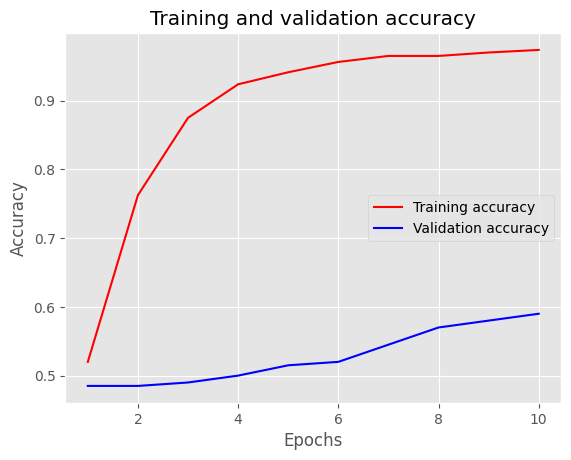

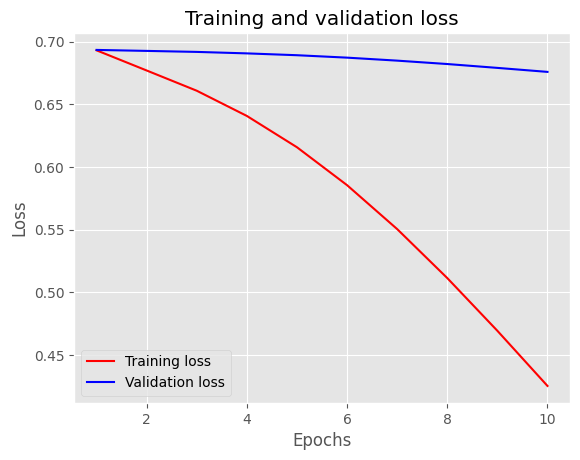

In [13]:
# Displaying accuracy and loss curves

# Training accuracy
train_acc = history3.history["acc"]
# Validation accuracy
validation_acc = history3.history["val_acc"]
# Training loss
train_loss = history3.history["loss"]
# Validation loss
validation_loss = history3.history["val_loss"]

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, "red", label = "Training accuracy")
plt.plot(epochs, validation_acc, "blue", label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, train_loss, "red", label = "Training loss")
plt.plot(epochs, validation_loss, "blue", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [14]:
# Evaluating the model on test data
test_loss3, test_accuracy3 = model_3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 [==============================] - 2s 2ms/step - loss: 0.6837 - acc: 0.5560
Test loss: 0.683692991733551
Test accuracy: 0.5560399889945984


custom-trained embedding layer with training sample size = 10000

In [15]:
# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = x_train[:10000]
y_train = y_train[:10000]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=maxlength)
x_test = pad_sequences(x_test, maxlen=maxlength)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model_4 = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model_4.add(Embedding(10000, 8, input_length=maxlength))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model_4.add(Flatten())

# We add the classifier on top
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_3 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
history4 = model_4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.6849 - acc: 0.5859 - val_loss: 0.6589 - val_acc: 0.6795
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5679 - acc: 0.7870 - val_loss: 0.4966 - val_acc: 0.7965
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3953 - acc: 0.8616 - val_loss: 0.3792 - val_acc: 0.8500
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.2954 - acc: 0.8939 - val_loss: 0.3376 - val_acc: 0.8590
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.2379 - acc: 0.9181 - val_loss: 0.3180 - val_acc: 0.8670
Epoch 6/10
250/250 [==============================] - 1s 6ms/step - loss: 0.1953 - acc: 0.9364 - val_loss: 0.3212 - val_acc: 0.8655
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.1630 - acc: 0.9507 - val_loss: 0.3113 - val_acc: 0.8650
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.

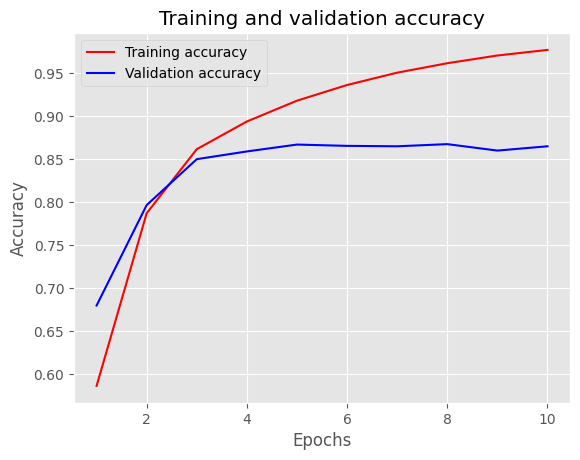

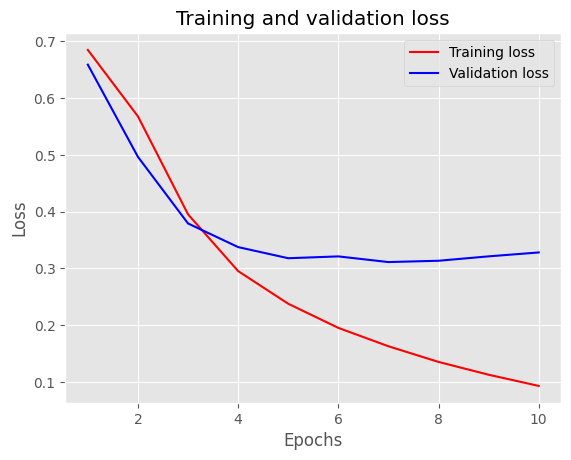

In [17]:
# Displaying accuracy and loss curves for training and validation

# Training accuracy
train_acc = history4.history["acc"]
# Validation accuracy
validation_acc = history4.history["val_acc"]
# Training loss
train_loss = history4.history["loss"]
# Validation loss
validation_loss = history4.history["val_loss"]

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, "red", label = "Training accuracy")
plt.plot(epochs, validation_acc, "blue", label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, train_loss, "red", label = "Training loss")
plt.plot(epochs, validation_loss, "blue", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [18]:
# Evaluating model on test data
test_loss4, test_accuracy4 = model_4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 [==============================] - 1s 2ms/step - loss: 0.3372 - acc: 0.8570
Test loss: 0.337211549282074
Test accuracy: 0.8569599986076355


In [19]:
# Downloading the IMDB dataseet
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup # removing unsup directory

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  12.3M      0  0:00:06  0:00:06 --:--:-- 18.5M


# # Data preprocessing for sentiment analysis

In [20]:

import os
import shutil

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [21]:
# Tokenizing the IMDB dataset

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen = 150 # cuts off review after 150 words
training_samples = 100 # Trains on 100 samples
validation_samples = 10000 # Validates 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index    # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)



Downloading and preprocessing the GloVe word embedding

In [22]:
import numpy as np
import requests
from io import BytesIO
import zipfile  # importing zipfile module

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.


pretrained word embedding layer with training sample size = 100

In [23]:
# Preparing the GloVe word embedding matix
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 15000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                480032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [26]:
# Compiling and training the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history11 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 2s 496ms/step - loss: 2.2916 - acc: 0.6000 - val_loss: 0.9774 - val_acc: 0.4991
Epoch 2/10
4/4 [==============================] - 1s 322ms/step - loss: 0.6015 - acc: 0.6700 - val_loss: 2.6287 - val_acc: 0.4990
Epoch 3/10
4/4 [==============================] - 1s 311ms/step - loss: 0.7547 - acc: 0.7300 - val_loss: 1.1801 - val_acc: 0.5013
Epoch 4/10
4/4 [==============================] - 1s 439ms/step - loss: 0.4694 - acc: 0.7400 - val_loss: 0.7338 - val_acc: 0.5414
Epoch 5/10
4/4 [==============================] - 1s 437ms/step - loss: 0.1738 - acc: 0.9200 - val_loss: 2.3121 - val_acc: 0.4989
Epoch 6/10
4/4 [==============================] - 1s 440ms/step - loss: 0.3839 - acc: 0.8800 - val_loss: 0.8829 - val_acc: 0.5171
Epoch 7/10
4/4 [==============================] - 1s 441ms/step - loss: 0.0717 - acc: 1.0000 - val_loss: 0.7819 - val_acc: 0.5354
Epoch 8/10
4/4 [==============================] - 3s 874ms/step - loss: 0.0338 - acc: 1.00

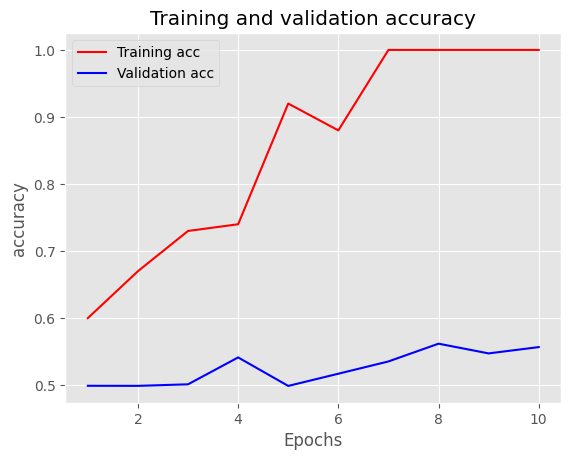

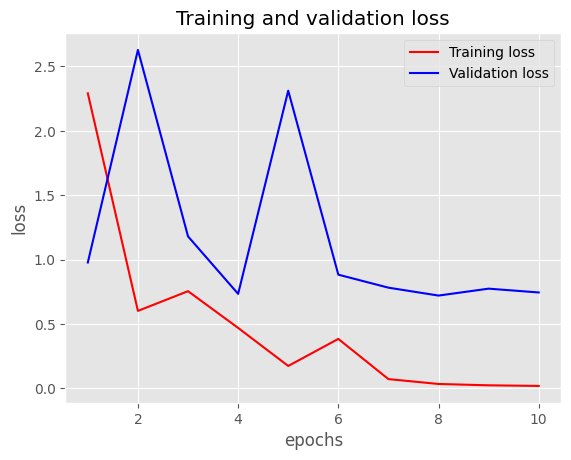

In [27]:
# Displaying accuracy and loss curves for training and validation

import matplotlib.pyplot as plt

accuracy = history11.history['acc']
valid_accuracy = history11.history['val_acc']
train_loss = history11.history['loss']
valid_loss = history11.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'red', label='Training acc')
plt.plot(epochs, valid_accuracy, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'red', label='Training loss')
plt.plot(epochs, valid_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.show()

In [28]:
# Evaluating the model on test dataset
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.7996 - acc: 0.5013
Test loss: 0.7996143698692322
Test accuracy: 0.5013200044631958


pretrained word embedding layer with training sample size = 5000

In [29]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150
train_data = 5000
valid_data = 10000
words = 10000

# Tokenizing the data
tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data+valid_data]
y_validation = labels[train_data:train_data+valid_data]
embedd_di = 100

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [30]:
# Embedding word matrix
embedd_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(words, embedd_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_5 (Flatten)         (None, 15000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                480032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Compiling the model
model11.layers[0].set_weights([embedd_matrix])
model11.layers[0].trainable = False
model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Training the model
history11 = model11.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model11.save_weights('pre_trained_glove_model.h5')


Epoch 1/10
157/157 [==============================] - 6s 30ms/step - loss: 0.7330 - acc: 0.5004 - val_loss: 0.6934 - val_acc: 0.4944
Epoch 2/10
157/157 [==============================] - 5s 29ms/step - loss: 0.6950 - acc: 0.5160 - val_loss: 0.6931 - val_acc: 0.4988
Epoch 3/10
157/157 [==============================] - 5s 29ms/step - loss: 0.6735 - acc: 0.5854 - val_loss: 0.7482 - val_acc: 0.4967
Epoch 4/10
157/157 [==============================] - 2s 14ms/step - loss: 0.6006 - acc: 0.6812 - val_loss: 0.7396 - val_acc: 0.4941
Epoch 5/10
157/157 [==============================] - 2s 14ms/step - loss: 0.5101 - acc: 0.7560 - val_loss: 0.8184 - val_acc: 0.4981
Epoch 6/10
157/157 [==============================] - 2s 14ms/step - loss: 0.4298 - acc: 0.8156 - val_loss: 0.8591 - val_acc: 0.4989
Epoch 7/10
157/157 [==============================] - 2s 15ms/step - loss: 0.3370 - acc: 0.8654 - val_loss: 0.9142 - val_acc: 0.4904
Epoch 8/10
157/157 [==============================] - 4s 26ms/step - 

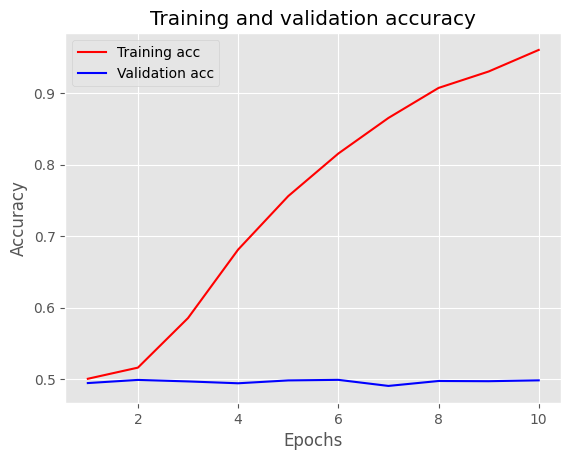

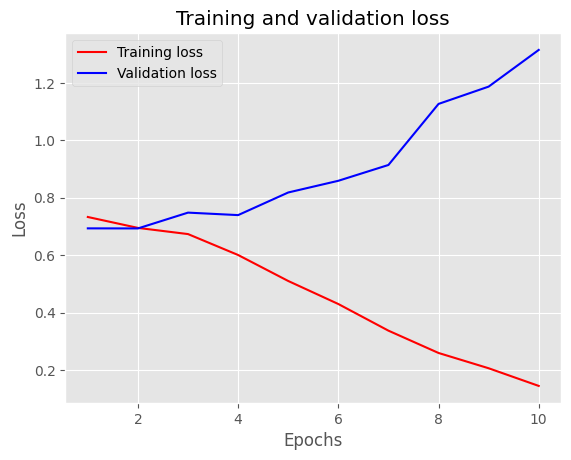

In [32]:
# Displaying the accuracy and loss curves
import matplotlib.pyplot as plt

accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'red', label='Training acc')
plt.plot(epochs, valid_acc11, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'red', label='Training loss')
plt.plot(epochs, valid_loss11, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [33]:
# Evaluating the model on test dataset
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 [==============================] - 3s 4ms/step - loss: 1.2871 - acc: 0.4997
Test loss: 1.2870886325836182
Test accuracy: 0.4996800124645233


pretrained word embedding layer with training sample size = 1000

In [34]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
train_data = 1000 #Trains on 1000 samples
valid_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_val = data[train_data:train_data+valid_data]
y_val = labels[train_data:train_data+valid_data]
embedding_dim = 100

embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector



Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [35]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=length))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 15000)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                480032    
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Compiling the model
model12.layers[0].set_weights([embedd_matrix])
model12.layers[0].trainable = False
model12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Training the model
history12 = model12.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model12.save_weights('pre_trained_glove_model.h5')



Epoch 1/10
32/32 [==============================] - 4s 106ms/step - loss: 0.9669 - acc: 0.4820 - val_loss: 0.6931 - val_acc: 0.5072
Epoch 2/10
32/32 [==============================] - 2s 68ms/step - loss: 0.7111 - acc: 0.5160 - val_loss: 0.7374 - val_acc: 0.5010
Epoch 3/10
32/32 [==============================] - 3s 97ms/step - loss: 0.7089 - acc: 0.5640 - val_loss: 0.7058 - val_acc: 0.5083
Epoch 4/10
32/32 [==============================] - 3s 95ms/step - loss: 0.6544 - acc: 0.6230 - val_loss: 0.7358 - val_acc: 0.4939
Epoch 5/10
32/32 [==============================] - 1s 38ms/step - loss: 0.5428 - acc: 0.7400 - val_loss: 0.7221 - val_acc: 0.4949
Epoch 6/10
32/32 [==============================] - 2s 49ms/step - loss: 0.4343 - acc: 0.8150 - val_loss: 0.7506 - val_acc: 0.4911
Epoch 7/10
32/32 [==============================] - 1s 37ms/step - loss: 0.3034 - acc: 0.8800 - val_loss: 0.8661 - val_acc: 0.4939
Epoch 8/10
32/32 [==============================] - 1s 36ms/step - loss: 0.2240 - 

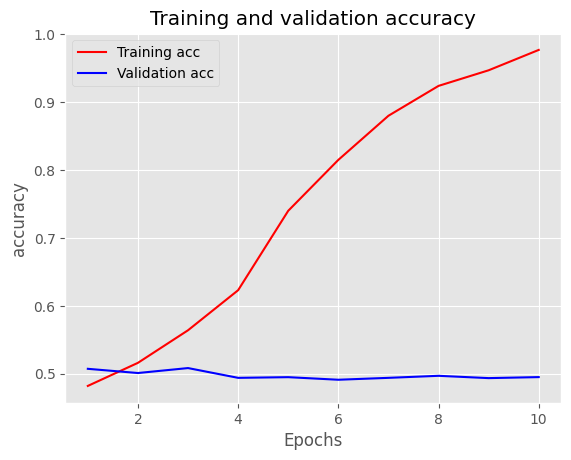

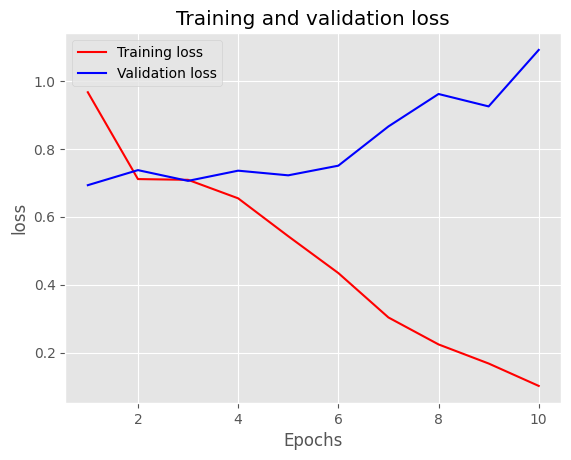

In [37]:
# Displaying the curves
import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'red', label='Training acc')
plt.plot(epochs, val_acc12, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'red', label='Training loss')
plt.plot(epochs, val_loss12, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

plt.show()

In [38]:
# Evaluating the model on test dataset
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 [==============================] - 5s 6ms/step - loss: 1.0732 - acc: 0.5013
Test loss: 1.0732334852218628
Test accuracy: 0.5013200044631958


pretrained word embedding layer with training sample size = 10000

In [39]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
train_ds = 10000 # Trains on 10000 samples
valid_ds = 10000
words = 10000

# Tokenizing the dataset
tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)



Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [40]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_ds]
y_train = labels[:train_ds]
x_val = data[train_ds:train_ds+valid_ds]
y_val = labels[train_ds:train_ds+valid_ds]
embedd_dim = 100

embedd_matrix = np.zeros((words, embedd_dim))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model13 = Sequential()
model13.add(Embedding(words, embedding_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 15000)             0         
                                                                 
 dense_10 (Dense)            (None, 32)                480032    
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# Compiling the model
model13.layers[0].set_weights([embedd_matrix])
model13.layers[0].trainable = False
model13.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# training the model
history13 = model13.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model13.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
313/313 [==============================] - 4s 12ms/step - loss: 0.7188 - acc: 0.5016 - val_loss: 0.6933 - val_acc: 0.4942
Epoch 2/10
313/313 [==============================] - 5s 16ms/step - loss: 0.6942 - acc: 0.5078 - val_loss: 0.6932 - val_acc: 0.4942
Epoch 3/10
313/313 [==============================] - 7s 22ms/step - loss: 0.6949 - acc: 0.5042 - val_loss: 0.6932 - val_acc: 0.5049
Epoch 4/10
313/313 [==============================] - 6s 21ms/step - loss: 0.6948 - acc: 0.5117 - val_loss: 0.6969 - val_acc: 0.5083
Epoch 5/10
313/313 [==============================] - 5s 17ms/step - loss: 0.6826 - acc: 0.5420 - val_loss: 0.7070 - val_acc: 0.5054
Epoch 6/10
313/313 [==============================] - 4s 13ms/step - loss: 0.6577 - acc: 0.5947 - val_loss: 0.7047 - val_acc: 0.5113
Epoch 7/10
313/313 [==============================] - 4s 13ms/step - loss: 0.6190 - acc: 0.6536 - val_loss: 0.7211 - val_acc: 0.5083
Epoch 8/10
313/313 [==============================] - 5s 17ms/step - 

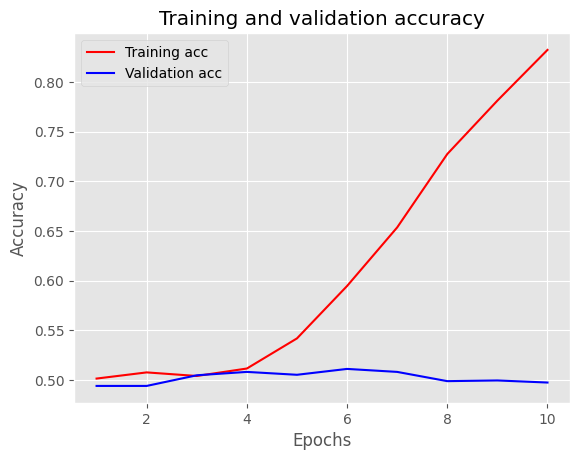

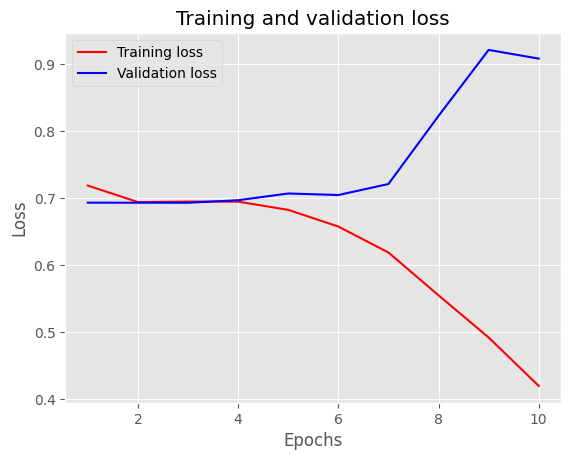

In [42]:
# Displaying the accuracy and loss curves in the graph
import matplotlib.pyplot as plt

accuracy13 = history13.history['acc']
valid_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'red', label='Training acc')
plt.plot(epochs, valid_acc13, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'red', label='Training loss')
plt.plot(epochs, valid_loss13, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [43]:
# Evaluating the model on test data
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 [==============================] - 4s 5ms/step - loss: 0.9247 - acc: 0.4901
Test loss: 0.9246703386306763
Test accuracy: 0.49007999897003174
